In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from file

In [4]:
df = pd.read_csv('adult.data.csv')

---
# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  
---

In [5]:
df.head() # data looks like

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df.info() # types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isnull().sum().sum() # there is not any missing value

0

In [15]:
df.describe() # I need to eliminate some features. There are some outliers as age = 90 capital-loss = 4356 etc.

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


---
# How many of each race are represented in this dataset?
---

<AxesSubplot:>

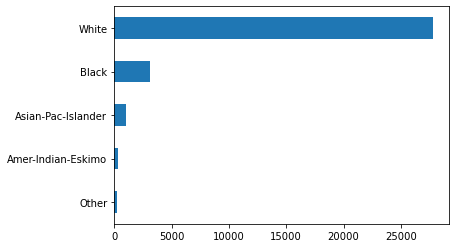

In [7]:
df.race.value_counts().sort_values().plot.barh()

---
# What is the average age of men/women?
---

In [6]:
round(df.groupby("sex")["age"].mean(),0)

sex
Female    37.0
Male      39.0
Name: age, dtype: float64

---
# What is the percentage of people who have a Bachelor's degree?
---

In [76]:
df["education"][df.education == "Bachelors"].count() / df["education"].count() * 100 # %16,44 

16.44605509658794

---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [103]:
df["salary"][(df["salary"] == ">50K") & ((df["education"] == "Bachelors") | (df["education"] == "Masters") | (df["education"] == "Doctorate"))].count() / df["salary"].count() * 100

10.706059396210192

---
# What percentage of people without advanced education make more than 50K?
---

In [104]:
df["salary"][(df["salary"] == ">50K") & ~((df["education"] == "Bachelors") | (df["education"] == "Masters") | (df["education"] == "Doctorate"))].count() / df["salary"].count() * 100

13.374896348392248

---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [199]:
df["salary"][(df["salary"] == ">50K") & (df["hours-per-week"] == df["hours-per-week"].min())].count() / df["salary"].count() * 100

0.006142317496391388

 ---
 # What country has the highest percentage of people that earn >50K?
 ---


In [134]:
df["native-country"].count()

32561

In [145]:
df.groupby("native-country")["salary"].count()

native-country
?                               583
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua    

In [162]:
df.groupby("native-country")["salary"].value_counts()

native-country  salary
?               <=50K      437
                >50K       146
Cambodia        <=50K       12
                >50K         7
Canada          <=50K       82
                          ... 
United-States   >50K      7171
Vietnam         <=50K       62
                >50K         5
Yugoslavia      <=50K       10
                >50K         6
Name: salary, Length: 82, dtype: int64

In [168]:
(df["native-country"][df["salary"] == ">50K"].value_counts() / df.groupby("native-country")["salary"].count() * 100)

?                             25.042882
Cambodia                      36.842105
Canada                        32.231405
China                         26.666667
Columbia                       3.389831
Cuba                          26.315789
Dominican-Republic             2.857143
Ecuador                       14.285714
El-Salvador                    8.490566
England                       33.333333
France                        41.379310
Germany                       32.116788
Greece                        27.586207
Guatemala                      4.687500
Haiti                          9.090909
Holand-Netherlands                  NaN
Honduras                       7.692308
Hong                          30.000000
Hungary                       23.076923
India                         40.000000
Iran                          41.860465
Ireland                       20.833333
Italy                         34.246575
Jamaica                       12.345679
Japan                         38.709677


In [194]:
(df["native-country"][df["salary"] == ">50K"].value_counts() / df.groupby("native-country")["salary"].count() * 100).max() # Iran ı gösteremedim.

41.86046511627907

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [191]:
df["occupation"][(df["salary"] == ">50K") & (df["native-country"] == "India")].value_counts()

Prof-specialty      25
Exec-managerial      8
Tech-support         2
Other-service        2
Sales                1
Transport-moving     1
Adm-clerical         1
Name: occupation, dtype: int64

In [192]:
df["occupation"][(df["salary"] == ">50K") & (df["native-country"] == "India")].value_counts().max() # Prof-specialty gösteremedim.

25

----
---

* homework :
    1. If the age raises, does the salary increase also?
    2. What is the woking-hours distribution among US native?
    3. What is the most seen salary within married people?
    4. Avarage marriage rate in terms of nationality? 

* if you answer these questions you will be nominated to code-master badge. 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('adult.data.csv')
df.groupby("salary")["age"].value_counts()

salary  age
<=50K   23     865
        25     788
        24     767
        27     754
        20     753
              ... 
>50K    81       3
        19       2
        80       2
        83       2
        84       1
Name: age, Length: 138, dtype: int64

In [25]:
df.groupby("age")["salary"].value_counts()

age  salary
17   <=50K     395
18   <=50K     550
19   <=50K     710
     >50K        2
20   <=50K     753
              ... 
86   <=50K       1
87   <=50K       1
88   <=50K       3
90   <=50K      35
     >50K        8
Name: salary, Length: 138, dtype: int64

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('adult.data.csv')
df["hours-per-week"][df["native-country"] == "United-States"].value_counts()

40    13418
50     2593
45     1676
60     1332
35     1135
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('adult.data.csv')
df["salary"][df["marital-status"] == "Married-civ-spouse"].value_counts()

<=50K    8284
>50K     6692
Name: salary, dtype: int64

In [39]:
df.groupby("salary")["marital-status"].value_counts()

salary  marital-status       
<=50K   Never-married            10192
        Married-civ-spouse        8284
        Divorced                  3980
        Separated                  959
        Widowed                    908
        Married-spouse-absent      384
        Married-AF-spouse           13
>50K    Married-civ-spouse        6692
        Never-married              491
        Divorced                   463
        Widowed                     85
        Separated                   66
        Married-spouse-absent       34
        Married-AF-spouse           10
Name: marital-status, dtype: int64

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('adult.data.csv')
#Avarage marriage rate in terms of nationality?

df["native-country"][df["marital-status"] != "Never-married"].value_counts() / df["native-country"].count() * 100

United-States                 60.167071
Mexico                         1.268389
?                              1.191610
Philippines                    0.423820
Germany                        0.316329
Canada                         0.270262
Puerto-Rico                    0.248764
India                          0.242622
Cuba                           0.236479
China                          0.196554
England                        0.190412
Italy                          0.187341
El-Salvador                    0.171985
South                          0.162771
Poland                         0.144344
Japan                          0.138202
Dominican-Republic             0.132060
Jamaica                        0.128989
Columbia                       0.119775
Iran                           0.107491
Guatemala                      0.101348
Vietnam                        0.098277
Taiwan                         0.092135
Portugal                       0.092135
Haiti                          0.085992
